# Joanna Brown

## Research question/interests :

This semester we are analyzing a dataset provided by Inside Airbnb. 

As many of you know when you are browsing Airbnb listings, some of the hosts are designated as "superhosts"...I am curious to know what sets them apart. 

I am interested in discovering how the ratings of superhosts compare to those of regular hosts. 

### Task 1. EDA :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import missingno
import plotly.express as px
%matplotlib inline
#sns.set_theme
#sns.set

In [2]:
#TO DO
#Clean up outliers?
#Rename columns?
#Link Analysis and project functions
#Attribute code properly 



In [3]:
df = pd.read_csv ("../data/raw/listings.csv")

In [4]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210806113117,2021-08-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20210806113117,2021-08-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.56
2,23691,https://www.airbnb.com/rooms/23691,20210806113117,2021-08-07,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.79
3,27423,https://www.airbnb.com/rooms/27423,20210806113117,2021-08-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,5.00,4.82,4.82,NaN,f,1,1,0,0,0.21
4,28160,https://www.airbnb.com/rooms/28160,20210806113117,2021-08-06,"Safe, Central, Quiet and Great Amenities!",NaN,Simply the best and safest neighbourhood in T....,https://a0.muscache.com/pictures/166666/71e95e...,86838,https://www.airbnb.com/users/show/86838,...,5.00,5.00,4.86,NaN,f,1,1,0,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15079,51492931,https://www.airbnb.com/rooms/51492931,20210806113117,2021-08-06,Spacious Studio Apartment Downtown Toronto Sma...,Very spacious cozy studio apartment. Located r...,The Kensington neighbourhood is defined by its...,https://a0.muscache.com/pictures/e7a25a9c-f8df...,311805447,https://www.airbnb.com/users/show/311805447,...,NaN,NaN,NaN,NaN,f,6,6,0,0,NaN
15080,51493223,https://www.airbnb.com/rooms/51493223,20210806113117,2021-08-06,Elegant One Bedroom Condo in Core Downtown,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/e90918d6-9268...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
15081,51493266,https://www.airbnb.com/rooms/51493266,20210806113117,2021-08-07,Bright large 2 bedrooms apt with separate entr...,Bright large 2 bedrooms apt with separate entr...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,259499767,https://www.airbnb.com/users/show/259499767,...,NaN,NaN,NaN,STR-2009-UDFHGC,f,5,3,2,0,NaN
15082,51493385,https://www.airbnb.com/rooms/51493385,20210806113117,2021-08-06,2 BR Condo Downtown with CN Tower View,Beautiful one bedroom condo in Entertainment d...,NaN,https://a0.muscache.com/pictures/f921100f-37dd...,416677873,https://www.airbnb.com/users/show/416677873,...,NaN,NaN,NaN,STR-2011-GDQKVF,f,4,4,0,0,NaN


In [5]:
#df.rename(columns={"review_scores_communication":"Reviews - Communication",
#                    "reviews_per_month": "Reviews per Month",
#                    "host_is_superhost": "Superhost"})

In [6]:
#from .. import project_functions2 # This is called a relative import
#df = project_functions.load_and_process(url_or_path_to_csv_file)
#df

In [7]:
#import project_functions2 as p2

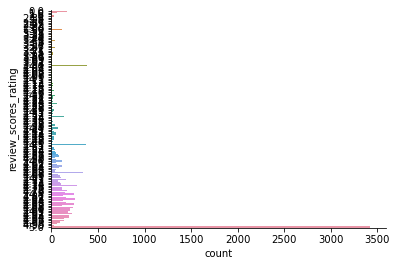

In [8]:
#not sure what to do wtith this one

sns.countplot(y='review_scores_rating',data=df)
sns.despine()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

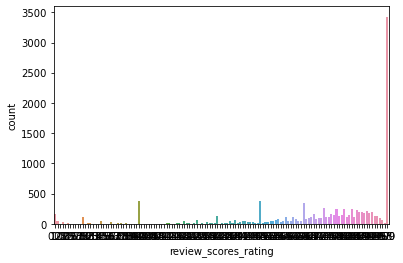

In [9]:
sns.countplot(x="review_scores_rating", data = df)
sns.despine

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15084 entries, 0 to 15083
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15084 non-null  int64  
 1   listing_url                                   15084 non-null  object 
 2   scrape_id                                     15084 non-null  int64  
 3   last_scraped                                  15084 non-null  object 
 4   name                                          15083 non-null  object 
 5   description                                   14598 non-null  object 
 6   neighborhood_overview                         9326 non-null   object 
 7   picture_url                                   15084 non-null  object 
 8   host_id                                       15084 non-null  int64  
 9   host_url                                      15084 non-null 

In [11]:
display(df.shape[0])

15084

In [12]:
display(df.shape[1])

74

In [13]:
df.describe(include='float64')

,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15077.000000,15077.000000,0.0,15084.000000,15084.000000,0.0,13945.000000,14873.000000,15084.000000,1.508400e+04,0.0,11609.000000,11435.000000,11437.000000,11434.000000,11434.000000,11433.000000,11434.000000,11609.000000
mean,5.689593,5.689593,NaN,43.681463,-79.397382,NaN,1.444532,1.645263,27.492761,4.942609e+05,NaN,4.650082,4.780028,4.679526,4.835753,4.837102,4.825204,4.694973,1.340099
std,18.884768,18.884768,NaN,0.048682,0.065256,NaN,0.824944,1.107654,39.570448,3.135789e+07,NaN,0.725082,0.430746,0.510812,0.383327,0.406078,0.336104,0.460011,3.584430
min,0.000000,0.000000,NaN,43.586740,-79.622620,NaN,1.000000,0.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,NaN,43.645490,-79.425860,NaN,1.000000,1.000000,28.000000,3.650000e+02,NaN,4.630000,4.750000,4.590000,4.830000,4.840000,4.780000,4.630000,0.160000
50%,1.000000,1.000000,NaN,43.663165,-79.397250,NaN,1.000000,1.000000,28.000000,1.125000e+03,NaN,4.840000,4.910000,4.840000,4.960000,4.970000,4.930000,4.810000,0.510000
75%,4.000000,4.000000,NaN,43.702235,-79.376487,NaN,2.000000,2.000000,28.000000,1.125000e+03,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.430000
max,272.000000,272.000000,NaN,43.833170,-79.119670,NaN,9.000000,13.000000,1125.000000,2.147484e+09,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,144.000000


In [14]:
df.describe(include='object').T

,count,unique,top,freq
listing_url,15084,15084,https://www.airbnb.com/rooms/1419,1
last_scraped,15084,2,2021-08-06,9702
name,15083,14742,Private room in a shared hostel suite downtown,8
description,14598,14018,Whether you are just getting away for the week...,12
neighborhood_overview,9326,7850,The lively Entertainment District lives up to ...,60
picture_url,15084,14646,https://a0.muscache.com/pictures/5b42a820-a046...,12
host_url,15084,9864,https://www.airbnb.com/users/show/10202618,71
host_name,15077,4740,David,105
host_since,15077,3272,2013-11-23,73
host_location,15070,336,"Toronto, Ontario, Canada",11048


### Task 2. Set up Analysis Pipeline :

What columns have empty values / missing data?

In [15]:
all_data = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

In [16]:
missing_data = pd.DataFrame({'Missing Data (%)' : round(all_data, 2)}) 

In [17]:
display(missing_data)

,Missing Data (%)
neighbourhood_group_cleansed,100.00
calendar_updated,100.00
bathrooms,100.00
license,71.03
host_about,45.24
...,...
minimum_maximum_nights,0.00
maximum_maximum_nights,0.00
minimum_nights_avg_ntm,0.00
maximum_nights_avg_ntm,0.00


We can see that "neighbourhood_group_cleansed", "calendar_updated", "bathrooms", and "license" are missing the majority of their data, so they can be removed from the dataset. 

In [18]:
df.drop(['neighbourhood_group_cleansed', 'license', 'calendar_updated', 'bathrooms'], axis=1, inplace=True)

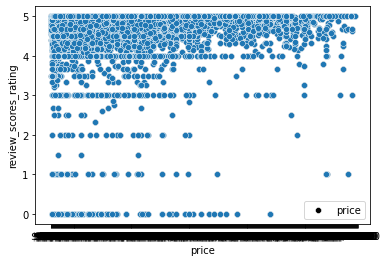

In [19]:
df['review_scores_rating'] = df['review_scores_rating'].astype(float)

ax = sns.scatterplot(data=df, x='price', y='review_scores_rating', color='black', label='price')
sns.scatterplot(data=df, x='price', y='review_scores_rating', ax=ax)

plt.show()

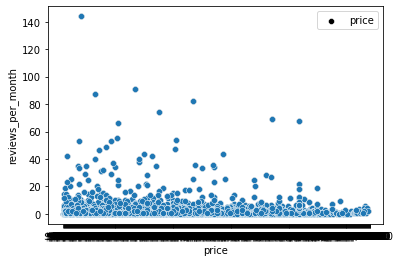

In [20]:
df['reviews_per_month'] = df['reviews_per_month'].astype(float)

ax = sns.scatterplot(data=df, x='price', y='reviews_per_month', color='black', label='price')
sns.scatterplot(data=df, x='price', y='reviews_per_month', ax=ax)

plt.show()

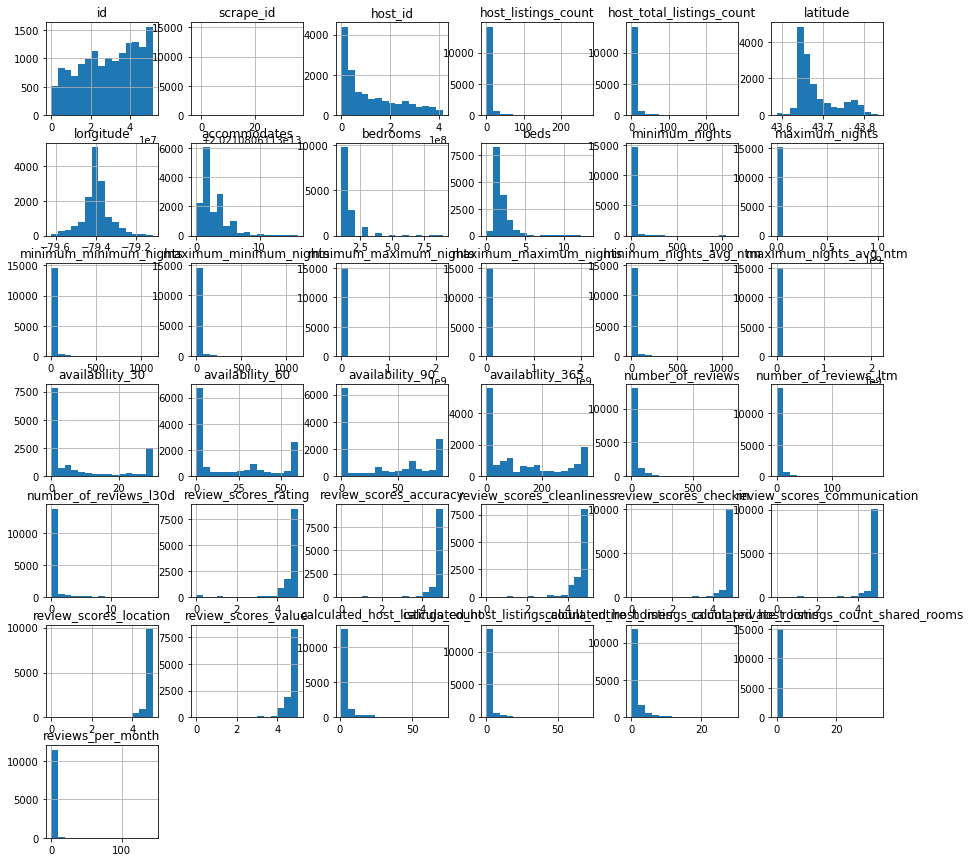

In [21]:
df.hist(bins=15, figsize=(15,15));

In [22]:
#df['price'] = df['price'].astype(float)

#ax = sns.distplot(df.price)
#ax.set(xlabel='Price in $', ylabel='% of Listings')
#plt.title('Price Distribution')
#plt.show()

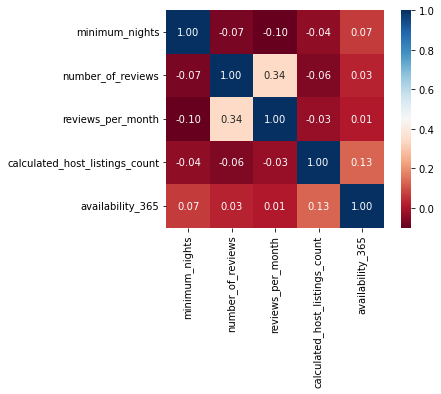

In [23]:
# making a correlation matrix - this is something we might want to do!!
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
'calculated_host_listings_count', 'availability_365']].corr()

#plotitng the heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);

Since we will be comparing superhosts and regualr hosts, we split the listings depending on whether or not the host is a superhost (based on t/f).

In [24]:
# adapted from ...
def split_host(df=df):
    """
        split listings into two categories : whether host is superhost or not(regular host)
    """
    superhosts = df[df.host_is_superhost == 't']
    regularhosts = df[df.host_is_superhost == 'f']
    
    return superhosts, regularhosts

superhosts, regularhosts = split_host()

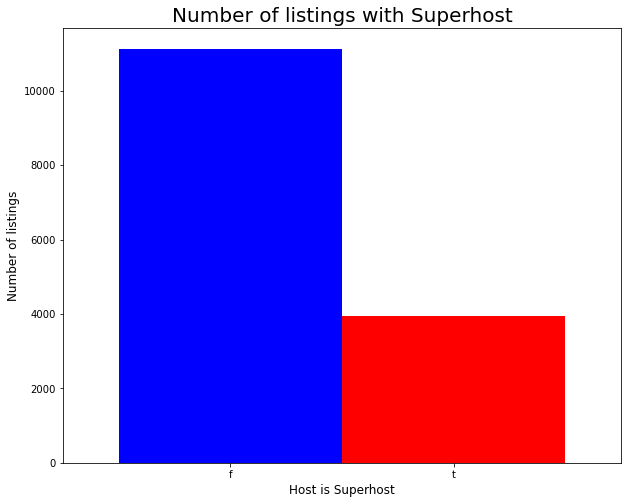

In [25]:
feq=df['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color=['b','r'], width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Host is Superhost', fontsize=12)
plt.show()

In [26]:
drop_columns = """
calculated_host_listings_count
latitude
longitude
id
scrape_id
host_id
""".split()


def get_useful_numeric_subset(df):
    """
        drop columns that do no have numeric data (ex: id, location)
    """
    return df.drop(columns=drop_columns)._get_numeric_data()


# get numeric subset of superhost, regular host
superhosts_num = get_useful_numeric_subset(superhosts)
regularhosts_num = get_useful_numeric_subset(regularhosts)

In [27]:
def get_num_mean_hosts(superhosts_num, regularhosts_num):
    """
        get mean values of numeric column by host
        mean() function skip NaN values
        NaN is difficult to measure, so exclude it
    """
    
    # drop useless columns and get only numeric data
    mean_compare = pd.concat(
        [
            superhosts_num.mean(), 
            regularhosts_num.mean()
        ], 
        axis=1)
    
    mean_compare.columns = ["superhost", "regular"]
    
    # add dataframe length on the first row
    return pd.concat([
        pd.DataFrame(
            [[len(superhosts), len(regularhosts)]], 
            index = ['count'],
            columns=mean_compare.columns), mean_compare])

numeric_mean_by_hosts = get_num_mean_hosts(superhosts_num, regularhosts_num)
numeric_mean_by_hosts

,superhost,regular
count,3943.000000,11134.000000
host_listings_count,3.962972,6.301060
host_total_listings_count,3.962972,6.301060
accommodates,3.176262,3.021376
bedrooms,1.476413,1.433249
beds,1.720397,1.618247
minimum_nights,22.309916,29.240974
maximum_nights,664.813847,90537.824052
minimum_minimum_nights,21.952828,28.973684
maximum_minimum_nights,22.905402,29.568888


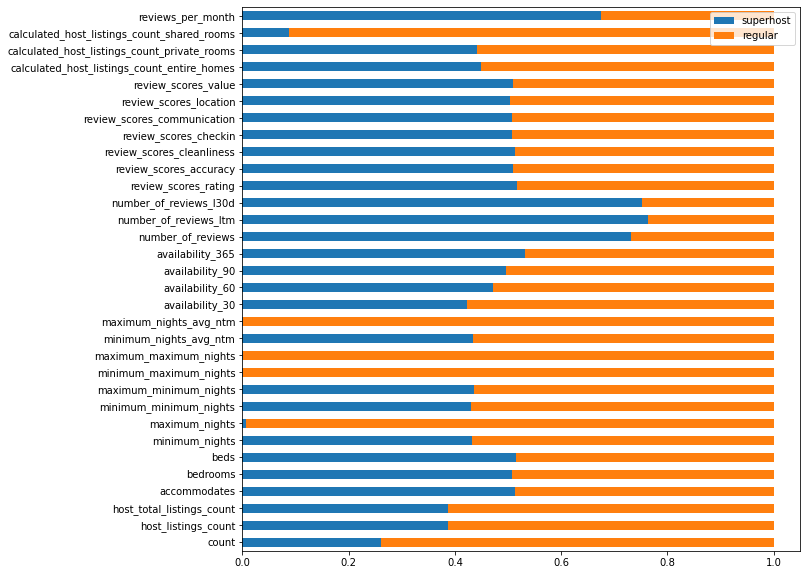

In [28]:
def plot_numeric_mean_by_host(numeric_mean_by_hosts):
    """
        Convert average values for each category into relative ratio for superhost and normal hosts. 
        Displayed as a bar histogram.
    """
    proportions = numeric_mean_by_hosts.div(numeric_mean_by_hosts.sum(axis=1), axis=0)
    proportions.plot(kind='barh', stacked='true', figsize=(10, 10))
    
plot_numeric_mean_by_host(numeric_mean_by_hosts)

In [29]:
def get_host_since_year(df):
    return df.host_since.str.split("-", expand=True)[0].astype(int)

In [30]:
def plot_hist_host_since(df, title):
    df.plot.hist(bins=len(df.value_counts()), title=title)

In [31]:
superhosts, regularhosts = split_host()

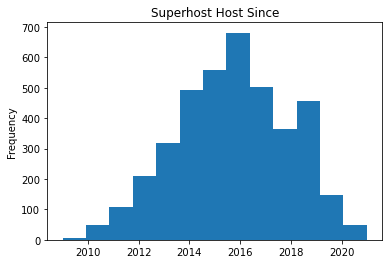

In [32]:
plot_hist_host_since(get_host_since_year(superhosts), "Superhost Host Since")

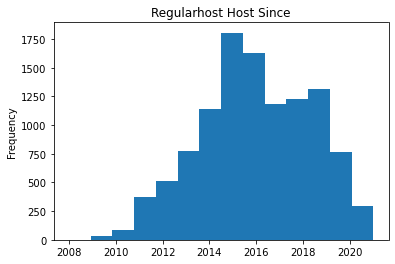

In [33]:
plot_hist_host_since(get_host_since_year(regularhosts), "Regularhost Host Since")